In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [54]:
trial_idx=1
paper='2004.04168'

# Code-generation prompts

In [84]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [56]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze the
Let's analyze the provided Hamiltonian equation and answer each question step by step.

#### HAMILTONIAN EQUATION:

```
$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k)  c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$
```

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see that the creation and annihilation operators are indexed by:
- `s` and `s'`: These appear to be flavor indices, possibly spin or orbital
- `k` and similar: These are momentum vectors, but they're not part of the flavor indices in this notat

In [7]:
print(generated_code['thinking'])

Let's analyze the provided Hamiltonian equation and answer each question step by step.

#### HAMILTONIAN EQUATION:

```
$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k)  c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$
```

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see that the creation and annihilation operators are indexed by:
- `s` and `s'`: These appear to be flavor indices, possibly spin or orbital
- `k` and similar: These are momentum vectors, but they're not part of the flavor indices in this notation

The operators have the form $c^\dagger_s(k)$ and $c_s(k)$ where `s

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
   "\\langle c_s^\\dagger(k_1) c_s(k_1) \\rangle": "Diagonal expectation value in the Hartree term",
   "\\langle c_s^\\dagger(k_1) c_{s'}(k_1) \\rangle": "Off-diagonal expectation value in the Fock term"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI (kinetic energy)
- $U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k2], I (Hartree term)
- $U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k2], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any, Dict
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with kinetic, Hartree, and Fock terms.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
     

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Dict
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with kinetic, Hartree, and Fock terms.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system.
    """
    def __init__(self, N_shell: int=3, parameters: Dict[str, Any]={'t_s': 1.0, 'U_0': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Two spin flavors (up and down)
        self.basis_order = {'0': 'spin'}
        # Order for spin: 0 = spin_up, 1 = spin_down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0  # Temperature
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive_vectors = self.a * np.array([[1, 0], [0.5, np.sqrt(3)/2]])  # Primitive vectors for triangul

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_1.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

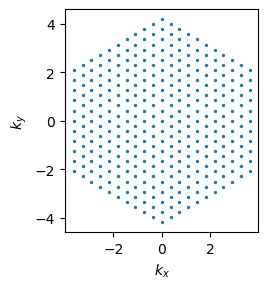

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Check energy dispersion for non-interacting term

In [60]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [ ]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [62]:
h_nonint = ham.generate_non_interacting()

In [63]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

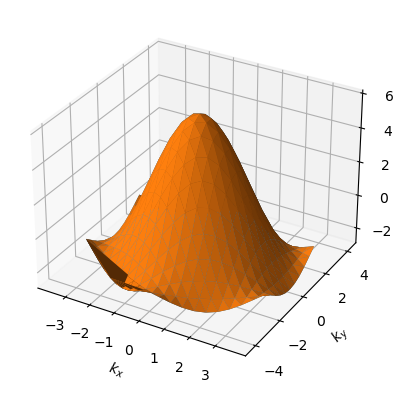

In [64]:
utils_auto.plot_2d_bandstructure(ham,en)

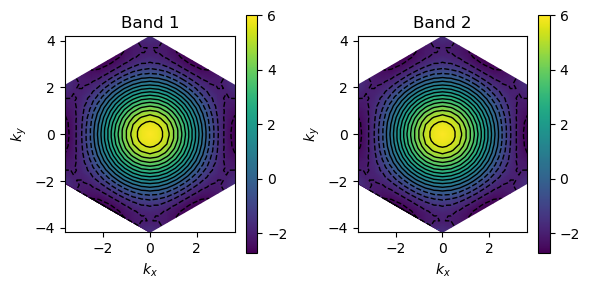

In [65]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Infinitesemial U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [67]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [68]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


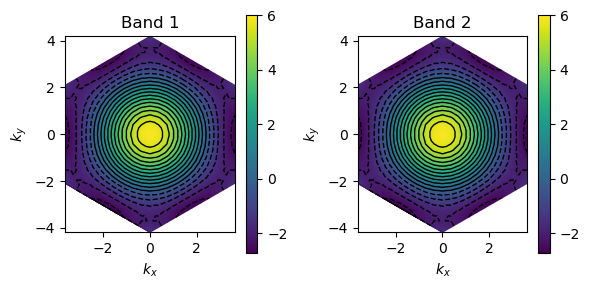

In [69]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Large U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)

In [71]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [72]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


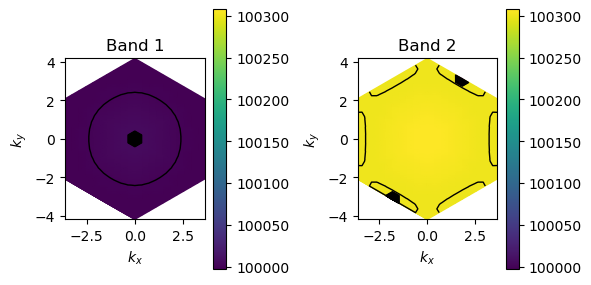

In [73]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [74]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is -310.85
U/T is 49320.70
mean_U is 50226.13


# Auto eval

## Task 1

In [75]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me analyze the
Let me analyze the image and the problem to determine if the mesh shown represents the first Brillouin zone of a triangular lattice correctly, as per the rubric.

The image shows a hexagonal arrangement of points in momentum (k) space, with kx on the horizontal axis and ky on the vertical axis. The points are distributed in a regular pattern forming a hexagon, which is characteristic of the first Brillouin zone of a triangular lattice.

In a triangular lattice:
1. The real space lattice has 6-fold rotational symmetry
2. The first Brillouin zone is a hexagon in k-space

Let's check the point group symmetry:
- The figure shows a hexagonal arrangement which is consistent with the symmetry of a triangular lattice
- The k-space mesh appears to have 6-fold rotational symmetry (rotation by 60°)
- The mesh is symmetric with respect to reflections across multiple axes
- The mesh extends from approximately -4 to 4 in ky and 

In [76]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [77]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me
Let me analyze the band structure plots in the image based on the rubric provided.

1. Shape of the Brillouin zone boundary:
   - I can see that the plots show a hexagonal boundary, which is indeed the expected shape for the first Brillouin zone of a triangular lattice. This is correct.

2. Symmetry of the energy distribution shown by the false color plot:

   2.1 Highest energy regions (yellow):
   - In both Band 1 and Band 2, the highest energy region (yellow) is at the center of the Brillouin zone (Γ point, where kx=0, ky=0).
   
   2.2 Pattern of energy variation across the zone:
   - The energy decreases radially outward from the center in a symmetric manner, shown by the concentric contour lines.
   - The contours form roughly circular patterns near the center that gradually become more hexagonal toward the zone boundary.
   
   2.3 Rotational symmetries present:
   - The energy distribution exhibits 6-fold rotational sy

In [78]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [79]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me
Let me analyze this image based on the rubric provided:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

The image shows a hexagonal Brillouin zone boundary, which is indeed the expected shape for a triangular lattice. The first Brillouin zone of a triangular lattice is a regular hexagon, which we can clearly see in both Band 1 and Band 2 plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy region (yellow) appears at the center of both Brillouin zones (at k = (0,0)).

2.2 Trace the pattern of energy variation across the zone:
From the center, the energy decreases radially outward in a circular/hexagonal pattern, with concentric contour lines showing the energy variation. The energy goes from highest (yellow) at the center to lowest (dark p

In [80]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [81]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper='2004.04168',U_int=1e5)
    )


#################### THINKING ####################

Let me
Let me analyze the image and evaluate it according to the rubric.

The image shows two false color plots labeled "Band 1" and "Band 2", which appear to be showing the band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation with a large interaction limit.

Let's go through the rubric point by point:

1. Shape of the Brillouin zone:
The boundary of the plots is hexagonal, which is indeed the expected shape for the first Brillouin zone of a triangular lattice. This is correct.

2. Symmetry of energy distribution:

2.1 Highest energy regions (yellow):
- In Band 1 (left plot), the highest energy regions appear to be very minimal or non-existent, as the plot is predominantly purple (low energy).
- In Band 2 (right plot), the highest energy regions (yellow) appear throughout most of the zone, with some darker areas (black) at the corners of the hexagon.

2.2 Pattern of energy variation:
- Band 1 sh

In [82]:
answer4=utils_auto.extract_result_content(result4['text'])

In [83]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '1' saved to final_answer.yaml
